In [42]:
%load_ext autoreload
%autoreload 2 
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [43]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import os
import pandas as pd
import numpy as np 
import pickle as pk
import glob
from fbprophet import Prophet
import sys
sys.path.append('../')
import wiki
from wiki import utils 
import multiprocessing as mp
total_proc = None
from tqdm import tqdm
from IPython.display import clear_output

# BROKEN series
Loops that never finished
* 2017-08-27 14:08:05,156 : INFO : [Process:ForkPoolWorker-10, on page:83021] COMPUTE loop
* 2017-08-27 14:09:01,145 : INFO : [Process:ForkPoolWorker-2, on page:14568] COMPUTE loop
* 2017-08-27 14:09:22,320 : INFO : [Process:ForkPoolWorker-4, on page:34608] COMPUTE loop

# CONCLUSION:
* They broke because they were not NaN in the the first row, but were all 0s... fml
* FIX: check if first entry is 0 and replace with 0.001
    * `pagedf.loc[0,pagedf.loc[0]==0] = 0.001`

In [44]:
PROPHET_PATH = '../data/prophet/'
RESULTS_PATH = 'results/'

In [63]:
pagedf = pd.read_feather(PROPHET_PATH+'pagedf.f')
ds = pd.read_feather(PROPHET_PATH+'ds.f')

In [64]:
pagedf.loc[:0,pagedf.loc[0]==0] = 0.01

In [65]:
pagedf.loc[:0, pagedf.loc[0]==0.01]

,50,69,92,96,100,160,182,190,195,204,...,144771,144801,144825,144852,144854,144857,144883,144920,144928,144947
0,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,...,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01


In [66]:
pagedf.loc[:0] = pagedf.loc[:0].fillna(0.001)
pagedf = pagedf.fillna(0)

In [67]:
pagedf.loc[0,pagedf.loc[0]==0]

Series([], Name: 0, dtype: float64)

In [35]:
pagedf.loc[0,pagedf.loc[0]==0] = 0.001

In [36]:
pagedf.head()

,0,1,2,3,4,5,6,7,8,9,...,145056,145057,145058,145059,145060,145061,145062,34608t1,34608t2,34608t3
0,18.0,11.0,1.0,35.0,0.001,12.0,0.001,118.0,5.0,6.0,...,0.001,0.001,0.001,0.001,0.001,0.001,0.001,NaN,0.001,0.001
1,11.0,14.0,0.0,13.0,0.000,7.0,0.000,26.0,23.0,3.0,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,NaN,0.000,NaN
2,5.0,15.0,1.0,10.0,0.000,4.0,0.000,30.0,14.0,5.0,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,NaN,0.000,NaN
3,13.0,18.0,1.0,94.0,0.000,5.0,0.000,24.0,12.0,12.0,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,NaN,0.000,NaN
4,14.0,11.0,0.0,4.0,0.000,20.0,0.000,29.0,9.0,6.0,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,NaN,0.000,NaN


In [37]:
process_page('83021')

/home/ubuntu/miniconda3/envs/basev1/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


('83021', 85.400458631248114, 126.66666666666667)

In [9]:
pagedf['83021'].count()

550

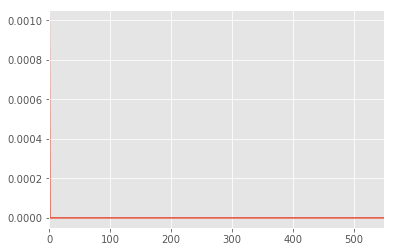

In [38]:
pagedf['83021'].plot()

In [15]:
pagedf['83021'].sum()

0.0

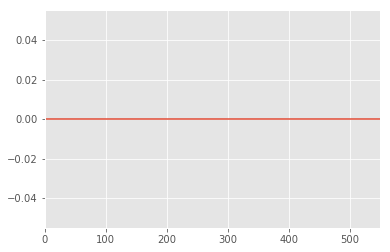

In [13]:
pagedf['34608'].plot()

In [14]:
pagedf['34608'].sum()

0.0

In [25]:
pagedf['34608t1'] = np.nan

In [26]:
pagedf['34608t2'] = 0

In [ ]:
pagedf.loc[0,'34608t1'] = 

In [68]:
# np.random.shuffle(pagedf.columns.values) DONT DO THIS

In [58]:
pagedf.columns.values

array(['13543', '70132', '36810', ..., '105533', '7395', '6214'], dtype=object)

In [72]:
pagedf.head()

,0,1,2,3,4,5,6,7,8,9,...,145053,145054,145055,145056,145057,145058,145059,145060,145061,145062
0,18.0,11.0,1.0,35.0,0.001,12.0,0.001,118.0,5.0,6.0,...,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001
1,11.0,14.0,0.0,13.0,0.000,7.0,0.000,26.0,23.0,3.0,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2,5.0,15.0,1.0,10.0,0.000,4.0,0.000,30.0,14.0,5.0,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
3,13.0,18.0,1.0,94.0,0.000,5.0,0.000,24.0,12.0,12.0,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
4,14.0,11.0,0.0,4.0,0.000,20.0,0.000,29.0,9.0,6.0,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [69]:
cols = pagedf.columns.values.copy()

In [73]:
lll = [1,2,3]

In [78]:
lll[0:None]

[1, 2, 3]

In [70]:
cols

array(['0', '1', '2', ..., '145060', '145061', '145062'], dtype=object)

In [71]:
pagedf.head()

,0,1,2,3,4,5,6,7,8,9,...,145053,145054,145055,145056,145057,145058,145059,145060,145061,145062
0,18.0,11.0,1.0,35.0,0.001,12.0,0.001,118.0,5.0,6.0,...,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001
1,11.0,14.0,0.0,13.0,0.000,7.0,0.000,26.0,23.0,3.0,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2,5.0,15.0,1.0,10.0,0.000,4.0,0.000,30.0,14.0,5.0,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
3,13.0,18.0,1.0,94.0,0.000,5.0,0.000,24.0,12.0,12.0,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
4,14.0,11.0,0.0,4.0,0.000,20.0,0.000,29.0,9.0,6.0,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [29]:
pagedf['34608t3'] = pagedf['34608t1']
pagedf.loc[0, '34608t3'] = 0.001

In [19]:
m = Prophet()

In [30]:
process_page('34608t3')

Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


/home/ubuntu/miniconda3/envs/basev1/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


RuntimeError: k initialized to invalid value (-nan)



In [27]:
process_page('34608t1')

/home/ubuntu/miniconda3/envs/basev1/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


TypeError: can only operate on a datetime with a rhs of a timedelta/DateOffset for addition and subtraction, but the operator [__truediv__] was passed

In [28]:
process_page('34608t2')

/home/ubuntu/miniconda3/envs/basev1/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


RuntimeError: k initialized to invalid value (-nan)



In [18]:
pagedf['34608']

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
5     NaN
6     NaN
7     NaN
8     NaN
9     NaN
10    NaN
11    NaN
12    NaN
13    NaN
14    NaN
15    NaN
16    NaN
17    NaN
18    NaN
19    NaN
20    NaN
21    NaN
22    NaN
23    NaN
24    NaN
25    NaN
26    NaN
27    NaN
28    NaN
29    NaN
       ..
520   NaN
521   NaN
522   NaN
523   NaN
524   NaN
525   NaN
526   NaN
527   NaN
528   NaN
529   NaN
530   NaN
531   NaN
532   NaN
533   NaN
534   NaN
535   NaN
536   NaN
537   NaN
538   NaN
539   NaN
540   NaN
541   NaN
542   NaN
543   NaN
544   NaN
545   NaN
546   NaN
547   NaN
548   NaN
549   NaN
Name: 34608, Length: 550, dtype: float64

In [7]:
pagedf.sum().sort_values()

145062    0.000000e+00
83827     0.000000e+00
83826     0.000000e+00
83825     0.000000e+00
83824     0.000000e+00
83823     0.000000e+00
83822     0.000000e+00
83821     0.000000e+00
83820     0.000000e+00
83819     0.000000e+00
83818     0.000000e+00
23544     0.000000e+00
83803     0.000000e+00
83802     0.000000e+00
83801     0.000000e+00
83800     0.000000e+00
83799     0.000000e+00
83798     0.000000e+00
83857     0.000000e+00
83797     0.000000e+00
32274     0.000000e+00
32272     0.000000e+00
32258     0.000000e+00
32259     0.000000e+00
32260     0.000000e+00
14877     0.000000e+00
32261     0.000000e+00
32262     0.000000e+00
32263     0.000000e+00
32264     0.000000e+00
              ...     
99537     1.037643e+08
28727     1.236943e+08
34257     1.243102e+08
33644     1.290204e+08
10399     1.332859e+08
39172     1.339931e+08
86431     1.341474e+08
69939     1.604313e+08
71199     1.654394e+08
90810     1.944912e+08
120336    2.107538e+08
66736     2.196368e+08
140151    2

In [9]:
pagedf.count().sort_values()[pagedf.count().sort_values() <= 10]

Series([], dtype: int64)

In [10]:
pagedf.iloc[0:-60].count().sort_values()[pagedf.iloc[0:-60].count().sort_values() <= 2]

Series([], dtype: int64)

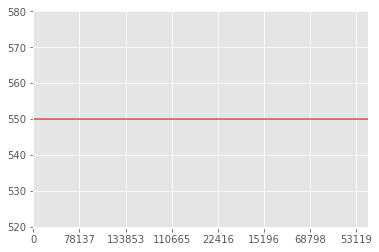

In [11]:
pagedf.count().sort_values().plot()

## Version 1.1f
Should set version directory name in next cell. Should describe version specifics (outliers, holidays, validation period)

* Val indexing on -60
* No outlier fixing
* Linear growth
* Truncating predictions at 0

### Remarks
* ?

In [22]:
# should break if the dir already exists - avoids accidental overwriting
VERSION = 'v1.6f/'
val_lims = (0,-60)
os.makedirs(PROPHET_PATH+VERSION)

In [9]:
#pagedf = pagedf.loc[:,:'10']

# WARNING:
Turned off the chained assignment warning - when slicing dfs they can return copies sometimes instead,
which will mean your assignment wont be done on the actual base df.
Not sure why it's still compaining at me when I'm using .loc for assignations everywhere... shitty

In [10]:
pd.options.mode.chained_assignment = None

In [20]:
def process_page(page):
    df = ds.join(pagedf[page])
    df.columns = ['ds','y']
    # note this is doing validation on last 60 days
    # should also consider doing validation on the time period we are forcasting
    traindf = df.iloc[val_lims[0]:val_lims[1]]
    traindf['train'] = 1 # feather won't serialize bool so 1s and 0s...
    # do outlier removal here
    #traindf.loc[traindf.y > traindf.y.quantile(.95), ['y']] = None
    m = Prophet(yearly_seasonality=True)
    m.fit(traindf)
    forecast = m.predict(ds)
    forecast['yhat_org'] = forecast['yhat']
    forecast.loc[forecast['yhat'] < 0,['yhat']] = 0.0
    forecast = forecast.join(df.y)
    forecast = forecast.join(traindf.loc[:,['train']]).fillna({'train':0}) # 0 bools
    forecast.to_feather(PROPHET_PATH+VERSION+page+'df.f')
    with open(PROPHET_PATH+VERSION+page+'m.pk', 'wb') as file:
        pk.dump(m,file)
    full_smape = wiki.val.smape(forecast.y, forecast.yhat)
    val_smape = wiki.val.smape(forecast[forecast['train'] == 0].y,forecast[forecast['train'] == 0].yhat)
    return (page, full_smape, val_smape)

In [9]:
pagedf['23845'].iloc[:-60].sum()

0.0

In [21]:
test_pagedf = pagedf.copy()

In [34]:
test_pagedf.iloc[0] = 0.0001

In [35]:
test_pagedf['23845'].iloc[:-60].sum()

0.0001

In [1]:
pagedf['23845'].sum()

NameError: name 'pagedf' is not defined

In [12]:
process_page('0')

('0', 50.762019028294311, 63.631257611154631)

In [ ]:
process_page('23845')

In [26]:
df23845 = pd.read_feather(PROPHET_PATH+VERSION+'23845df.f')

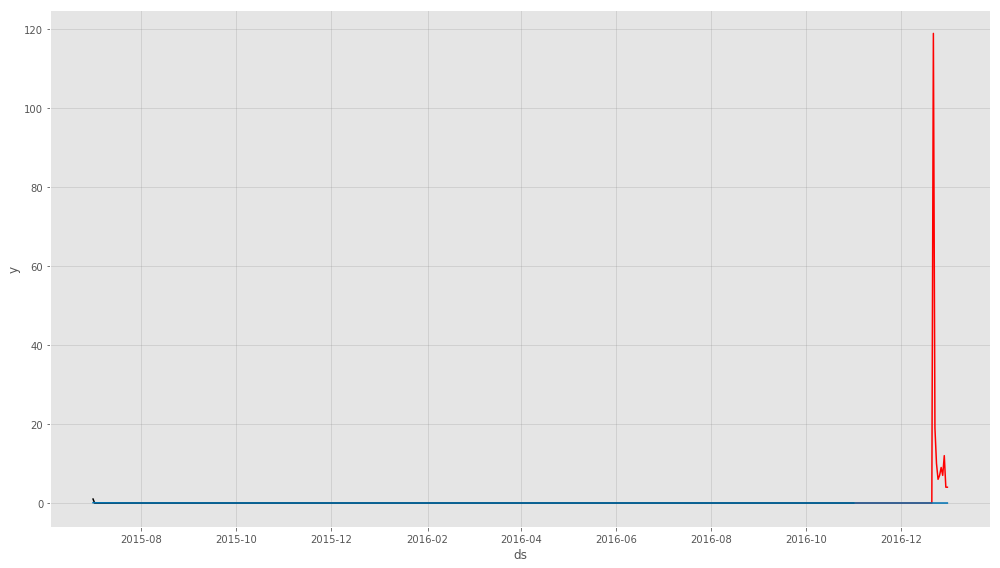

In [27]:
wiki.newphet.prophet_plot(df23845)

In [38]:
process_page('83821')

('83821', 78.854314047564927, 86.666666666666671)

In [39]:
df83821 = pd.read_feather(PROPHET_PATH+VERSION+'83821df.f')

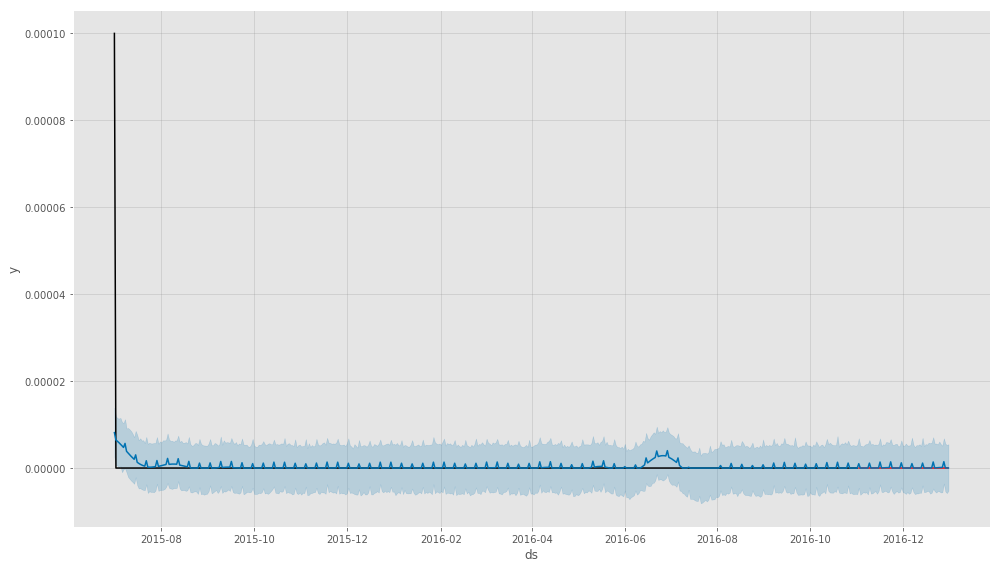

In [40]:
wiki.newphet.prophet_plot(df83821)

In [38]:
process_page('79692')

Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


('79692', 183.99463488819524, 200.0)

In [39]:
df79692 = pd.read_feather(PROPHET_PATH+VERSION+'79692df.f')

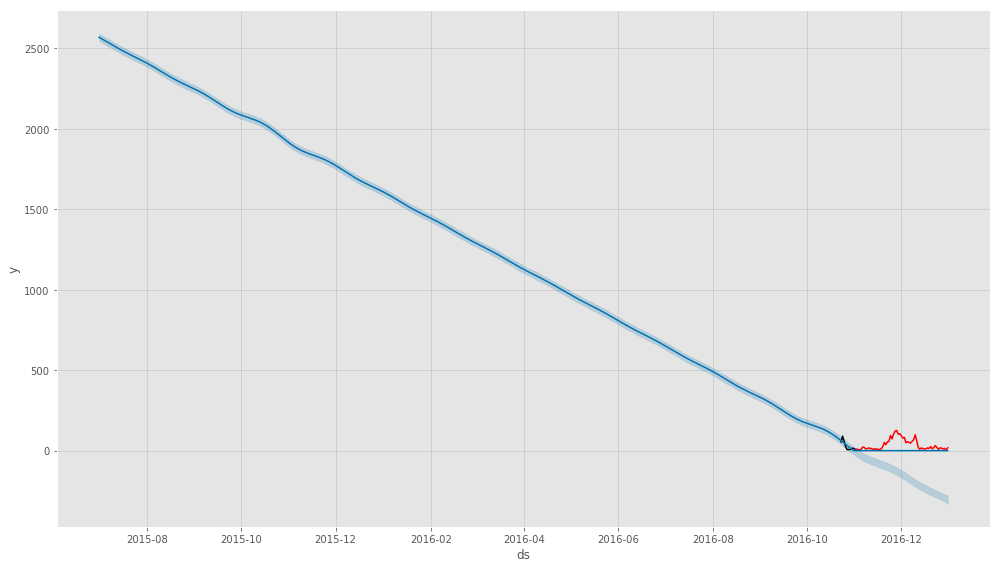

In [40]:
wiki.newphet.prophet_plot(df79692)

In [42]:
process_page('109038')

Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


RuntimeError: k initialized to invalid value (nan)



In [ ]:
df109038 = pd.read_feather(PROPHET_PATH+VERSION+'109038df.f')

In [ ]:
wiki.newphet.prophet_plot(df109038)

In [45]:
process_page('21299')

Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


('21299', 66.666666666666671, 200.0)

In [46]:
df21299 = pd.read_feather(PROPHET_PATH+VERSION+'21299df.f')

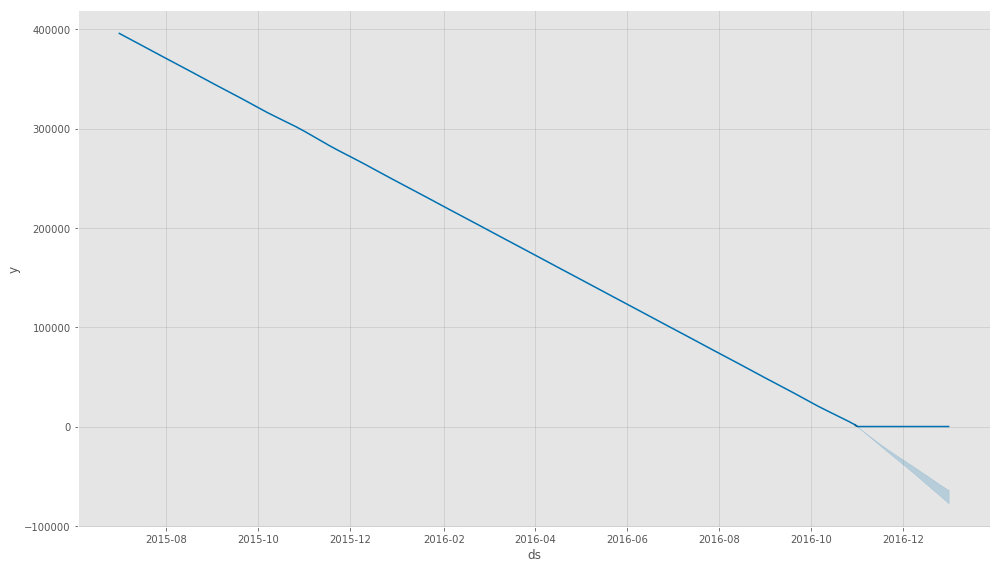

In [47]:
wiki.newphet.prophet_plot(df21299)

In [9]:
def wrapper(pages):
    val_results = []
    for page in tqdm(pages):
        val_results.append(process_page(page))
    return val_results

In [10]:
total_proc = mp.cpu_count()-1; total_proc

15

In [11]:
col_split = np.array_split(pagedf.columns, total_proc)
mp_pool = mp.Pool(total_proc)

  0%|          | 4/9671 [00:17<11:50:31,  4.41s/it]

Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


  0%|          | 9/9671 [00:33<8:33:57,  3.19s/it]]

Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


  0%|          | 16/9671 [01:09<11:43:00,  4.37s/it]

Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


  2%|▏         | 160/9671 [09:08<7:27:32,  2.82s/it] 

Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


  2%|▏         | 227/9671 [12:18<8:22:28,  3.19s/it]

Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


  8%|▊         | 783/9671 [35:34<5:56:41,  2.41s/it]

Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


 13%|█▎        | 1242/9670 [54:01<5:39:21,  2.42s/it]

Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


 15%|█▍        | 1429/9670 [1:01:47<5:31:02,  2.41s/it]

Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


 23%|██▎       | 2266/9671 [1:35:51<4:58:32,  2.42s/it]

Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


 24%|██▎       | 2293/9671 [1:36:47<4:55:43,  2.40s/it]

Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


 25%|██▌       | 2464/9671 [1:43:51<4:48:57,  2.41s/it]

Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


 26%|██▌       | 2520/9671 [1:45:36<4:47:42,  2.41s/it]

Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


 28%|██▊       | 2670/9671 [1:52:05<4:40:26,  2.40s/it]

Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


 32%|███▏      | 3092/9671 [2:10:30<5:26:47,  2.98s/it]

Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


 32%|███▏      | 3093/9671 [2:10:33<5:22:27,  2.94s/it]

Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


 32%|███▏      | 3094/9671 [2:10:35<5:17:50,  2.90s/it]

Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


 32%|███▏      | 3095/9671 [2:10:38<5:14:35,  2.87s/it]

Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


 32%|███▏      | 3096/9671 [2:10:41<5:13:57,  2.87s/it]

Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


 32%|███▏      | 3097/9671 [2:10:44<5:11:57,  2.85s/it]

Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


 32%|███▏      | 3098/9671 [2:10:47<5:12:07,  2.85s/it]

Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


 32%|███▏      | 3099/9671 [2:10:50<5:10:23,  2.83s/it]

Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


 32%|███▏      | 3100/9671 [2:10:52<5:09:06,  2.82s/it]

Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


 32%|███▏      | 3101/9671 [2:10:55<5:09:46,  2.83s/it]

Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


 32%|███▏      | 3102/9671 [2:10:58<5:08:19,  2.82s/it]

Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


 32%|███▏      | 3103/9671 [2:11:01<5:08:50,  2.82s/it]

Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


 32%|███▏      | 3104/9671 [2:11:04<5:08:46,  2.82s/it]

Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


 32%|███▏      | 3105/9671 [2:11:06<5:07:56,  2.81s/it]

Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


 32%|███▏      | 3106/9671 [2:11:09<5:08:54,  2.82s/it]

Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


 32%|███▏      | 3107/9671 [2:11:12<5:08:04,  2.82s/it]

Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


 32%|███▏      | 3108/9671 [2:11:15<5:08:33,  2.82s/it]

Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


 32%|███▏      | 3109/9671 [2:11:18<5:07:24,  2.81s/it]

Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


 32%|███▏      | 3110/9671 [2:11:20<5:06:37,  2.80s/it]

Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


 32%|███▏      | 3111/9671 [2:11:23<5:07:28,  2.81s/it]

Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


 32%|███▏      | 3112/9671 [2:11:26<5:06:16,  2.80s/it]

Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


 32%|███▏      | 3113/9671 [2:11:29<5:07:02,  2.81s/it]

Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


In [12]:
with utils.clock():
    %time val_results = mp_pool.map(wrapper, col_split)

TypeError: can only operate on a datetime with a rhs of a timedelta/DateOffset for addition and subtraction, but the operator [__truediv__] was passed

Elapsed time 7889.484010696411 seconds


In [13]:
val_results = [item for sublist in val_results for item in sublist]
val_results = pd.DataFrame(val_results, columns=['page_index',VERSION[:-1]+'_full',VERSION[:-1]+'_val'])

NameError: name 'val_results' is not defined

In [ ]:
val_results.to_feather(PROPHET_PATH+RESULTS_PATH+VERSION[:-1]+'df.f')